In [179]:
import hashlib

## Số bit xoay mỗi vòng

In [180]:
rotate = [7, 12, 17, 22, 7, 12, 17, 22, 7, 12, 17, 22, 7, 12, 17, 22,
             5,  9, 14, 20, 5,  9, 14, 20, 5,  9, 14, 20, 5,  9, 14, 20,
             4, 11, 16, 23, 4, 11, 16, 23, 4, 11, 16, 23, 4, 11, 16, 23,
             6, 10, 15, 21, 6, 10, 15, 21, 6, 10, 15, 21, 6, 10, 15, 21]

## Hằng số K

In [181]:
K = [int(abs(math.sin(i + 1)) * 2**32) & 0xFFFFFFFF for i in range(64)]
print(K)

[3614090360, 3905402710, 606105819, 3250441966, 4118548399, 1200080426, 2821735955, 4249261313, 1770035416, 2336552879, 4294925233, 2304563134, 1804603682, 4254626195, 2792965006, 1236535329, 4129170786, 3225465664, 643717713, 3921069994, 3593408605, 38016083, 3634488961, 3889429448, 568446438, 3275163606, 4107603335, 1163531501, 2850285829, 4243563512, 1735328473, 2368359562, 4294588738, 2272392833, 1839030562, 4259657740, 2763975236, 1272893353, 4139469664, 3200236656, 681279174, 3936430074, 3572445317, 76029189, 3654602809, 3873151461, 530742520, 3299628645, 4096336452, 1126891415, 2878612391, 4237533241, 1700485571, 2399980690, 4293915773, 2240044497, 1873313359, 4264355552, 2734768916, 1309151649, 4149444226, 3174756917, 718787259, 3951481745]


## Vector khởi tạo

In [182]:
IV = [0x67452301, 0xefcdab89, 0x98badcfe, 0x10325476]

## Hàm thêm padding

In [183]:
def pad(msg: bytes) -> bytes:
    length = len(msg) * 8

    msg = msg + b'\x80'
    padding_len = (56 - len(msg) % 64) % 64
    msg = msg + (b'\x00' * padding_len)

    msg = msg + length.to_bytes(8, byteorder='little')

    return msg

## Hàm xoay trái 1 block

In [184]:
def leftRotate(x, i):
    return ((x << i) | (x >> (32 - i))) & 0xFFFFFFFF

## Đọc đầu vào từ file

In [185]:
with open("input.txt", "rb") as f:
    raw = f.read()
print(raw)
print(hashlib.md5(raw).hexdigest())
msg = pad(raw)

b'xin chao\r\nhom nay la mot ngay mua'
9634b9e6492c7923630f000ec19d5379


## Thuật toán băm

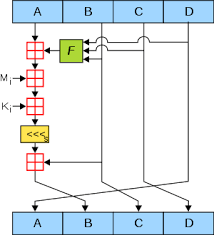

In [186]:
H = IV

for offs in range(0, len(msg), 64):
    A, B, C, D = H
    block = msg[offs : offs + 64]

    for i in range(64):
        if 0 <= i < 16:
            f = (B & C) | (~B & D)
            g = i
        elif 16 <= i < 32:
            f = (D & B) | (~D & C)
            g = (5 * i + 1) % 16
        elif 32 <= i < 48:
            f = B ^ C ^ D
            g = (3 * i + 5) % 16
        else:
            f = C ^ (B | ~D)
            g = (7 * i) % 16

        f &= 0xffffffff
        word = int.from_bytes(block[g*4 : g*4 + 4], 'little')

        temp = D
        D = C
        C = B
        A = (A + f + K[i] + word) & 0xffffffff
        A = leftRotate(A, rotate[i])
        B = (B + A) & 0xffffffff
        A = temp
        print(A, B, C, D)

    # feed-forward
    H[0] = (H[0] + A) & 0xffffffff
    H[1] = (H[1] + B) & 0xffffffff
    H[2] = (H[2] + C) & 0xffffffff
    H[3] = (H[3] + D) & 0xffffffff

271733878 3696534404 4023233417 2562383102
2562383102 2207725272 3696534404 4023233417
4023233417 2321901592 2207725272 3696534404
3696534404 715107303 2321901592 2207725272
2207725272 1269272134 715107303 2321901592
2321901592 2968492779 1269272134 715107303
715107303 1074976852 2968492779 1269272134
1269272134 687675155 1074976852 2968492779
2968492779 3332199093 687675155 1074976852
1074976852 158074498 3332199093 687675155
687675155 2560149472 158074498 3332199093
3332199093 4061716897 2560149472 158074498
158074498 3341721222 4061716897 2560149472
2560149472 2597190815 3341721222 4061716897
4061716897 4010163964 2597190815 3341721222
3341721222 2268577125 4010163964 2597190815
2597190815 4260696935 2268577125 4010163964
4010163964 1431821498 4260696935 2268577125
2268577125 1664336265 1431821498 4260696935
4260696935 625142420 1664336265 1431821498
1431821498 604911937 625142420 1664336265
1664336265 3762716216 604911937 625142420
625142420 3911013697 3762716216 604911937
60491193

In [187]:
result = b''
for i in H:
    result += i.to_bytes(4, byteorder='little')

print(result.hex())

print(hashlib.md5(raw).hexdigest())

9634b9e6492c7923630f000ec19d5379
9634b9e6492c7923630f000ec19d5379
